In [2]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
filename='sonar.csv'
df = pd.read_csv(filename, header=None)

In [29]:
set_option('display.width', 100)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [36]:
set_option('precision', 4)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,...,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000,208.0000
mean,0.0292,0.0384,0.0438,0.0539,0.0752,0.1046,0.1217,0.1348,0.1780,0.2083,...,0.0161,0.0134,0.0107,0.0109,0.0093,0.0082,0.0078,0.0079,0.0079,0.0065
std,0.0230,0.0330,0.0384,0.0465,0.0556,0.0591,0.0618,0.0852,0.1184,0.1344,...,0.0120,0.0096,0.0071,0.0073,0.0071,0.0057,0.0058,0.0065,0.0062,0.0050
min,0.0015,0.0006,0.0015,0.0058,0.0067,0.0102,0.0033,0.0055,0.0075,0.0113,...,0.0000,0.0008,0.0005,0.0010,0.0006,0.0004,0.0003,0.0003,0.0001,0.0006
25%,0.0134,0.0164,0.0189,0.0244,0.0381,0.0670,0.0809,0.0804,0.0970,0.1113,...,0.0084,0.0073,0.0051,0.0054,0.0042,0.0044,0.0037,0.0036,0.0037,0.0031
50%,0.0228,0.0308,0.0343,0.0440,0.0625,0.0922,0.1069,0.1121,0.1522,0.1824,...,0.0139,0.0114,0.0095,0.0093,0.0075,0.0069,0.0060,0.0058,0.0064,0.0053
75%,0.0355,0.0479,0.0580,0.0645,0.1003,0.1341,0.1540,0.1696,0.2334,0.2687,...,0.0208,0.0167,0.0149,0.0145,0.0121,0.0106,0.0104,0.0103,0.0103,0.0085
max,0.1371,0.2339,0.3059,0.4264,0.4010,0.3823,0.3729,0.4590,0.6828,0.7106,...,0.1004,0.0709,0.0390,0.0352,0.0447,0.0394,0.0355,0.0440,0.0364,0.0439


In [34]:
print(df.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object


In [40]:
# class distribution
df.groupby(60).size()

60
M    111
R     97
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

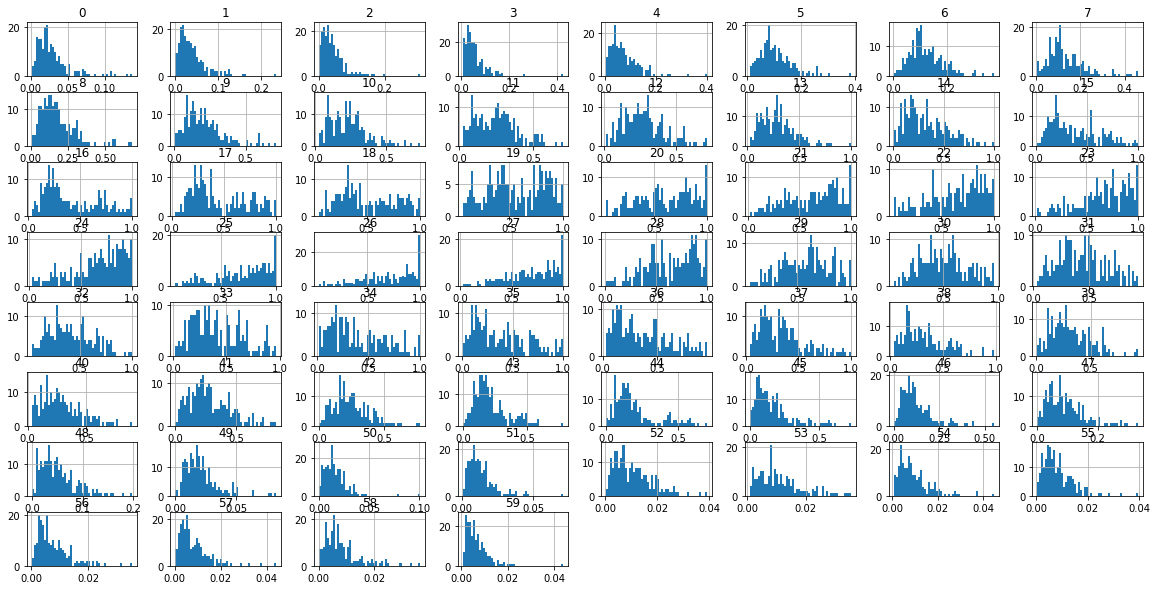

In [41]:
# get a feel for the distribution of the data in graphical format

%matplotlib inline 
#import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,10))
plt.show

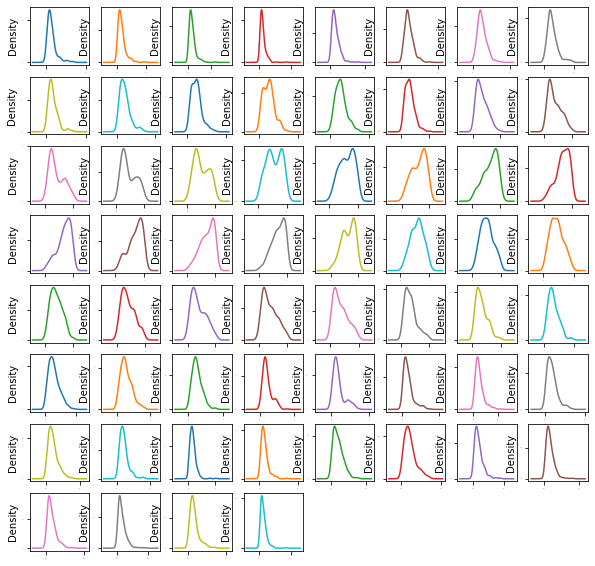

In [47]:
# density
%matplotlib inline 
df.plot(kind='density' , figsize=(10,10), subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

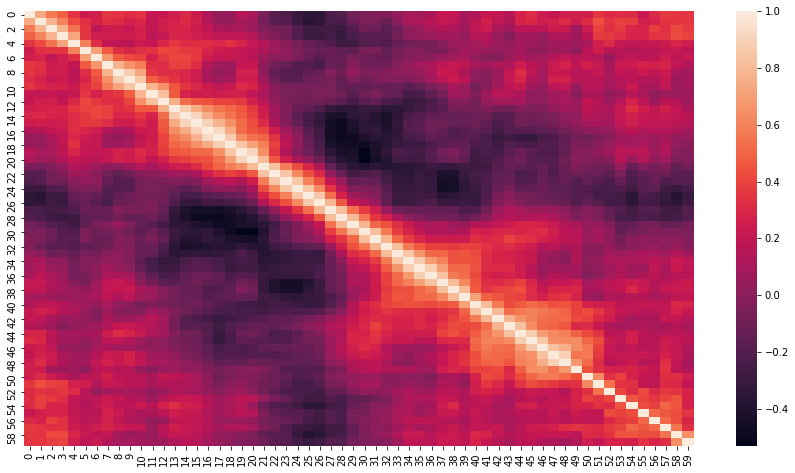

In [56]:
import seaborn as sns

# Using a correlation to see features that are highly correlated to the target(here, median_housing_value)
correlations = df.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(correlations, annot=False)

In [57]:
# Split-out validation dataset
array = df.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Evaluate Algorithms: Baseline

In [63]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f' {name}:   {cv_results.mean():.5f}    {cv_results.std():.5f} ')

 LR:   0.77757    0.08842 
 LDA:   0.77868    0.09357 
 KNN:   0.75882    0.10642 
 CART:   0.75110    0.10818 
 NB:   0.68272    0.13604 
 SVM:   0.76507    0.08752 


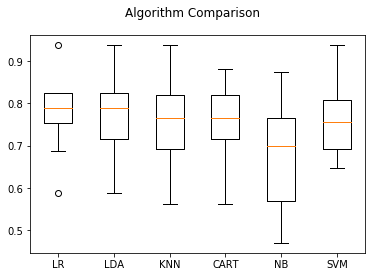

In [64]:
# Compare Algorithms with scaled data
fig = plt.figure()
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names) 
plt.show()

### Evaluate Algorithms: Standardize Data
#### We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. 

In [66]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f' {name} {cv_results.mean():.5f} {cv_results.std():.5f} ')

 ScaledLR 0.75441 0.06793 
 ScaledLDA 0.77868 0.09357 
 ScaledKNN 0.80846 0.10800 
 ScaledCART 0.73971 0.08548 
 ScaledNB 0.68272 0.13604 
 ScaledSVM 0.82610 0.08181 


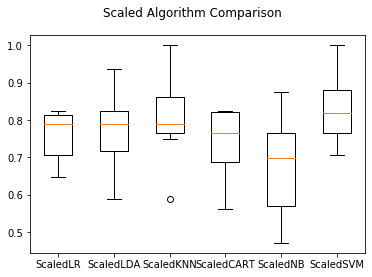

In [67]:
# Compare Algorithms with scaled data
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names) 
plt.show()

### Algo Tuning using GridSearch
#### Above results suggest scaledKNN and scaledSVM look promising. Lets tune these further

In [68]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
neighbors = [1,3,5,7,9,11,13,15,17,19,21] 
param_grid = dict(n_neighbors=neighbors) 
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

print(f"Best: {grid_result.best_score_:.5f} using {grid_result.best_params_} ")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f" {mean:.5f} {stdev:.5f} with: {param} ")

Best: 0.83603 using {'n_neighbors': 1} 
 0.83603 0.07949 with: {'n_neighbors': 1} 
 0.81360 0.08802 with: {'n_neighbors': 3} 
 0.81434 0.09687 with: {'n_neighbors': 5} 
 0.77757 0.12039 with: {'n_neighbors': 7} 
 0.73015 0.09938 with: {'n_neighbors': 9} 
 0.74154 0.07397 with: {'n_neighbors': 11} 
 0.71066 0.10583 with: {'n_neighbors': 13} 
 0.72316 0.08098 with: {'n_neighbors': 15} 
 0.69890 0.07267 with: {'n_neighbors': 17} 
 0.71066 0.09134 with: {'n_neighbors': 19} 
 0.69890 0.09119 with: {'n_neighbors': 21} 


In [70]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print(f"Best: {grid_result.best_score_:.5f} using {grid_result.best_params_} ")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f" {mean:.5f} {stdev:.5f} with: {param} ")

Best: 0.85000 using {'C': 1.7, 'kernel': 'rbf'} 
 0.74853 0.06995 with: {'C': 0.1, 'kernel': 'linear'} 
 0.58272 0.12706 with: {'C': 0.1, 'kernel': 'poly'} 
 0.60110 0.18443 with: {'C': 0.1, 'kernel': 'rbf'} 
 0.71287 0.11658 with: {'C': 0.1, 'kernel': 'sigmoid'} 
 0.75441 0.08234 with: {'C': 0.3, 'kernel': 'linear'} 
 0.64412 0.09987 with: {'C': 0.3, 'kernel': 'poly'} 
 0.74228 0.08185 with: {'C': 0.3, 'kernel': 'rbf'} 
 0.74853 0.06995 with: {'C': 0.3, 'kernel': 'sigmoid'} 
 0.76581 0.07034 with: {'C': 0.5, 'kernel': 'linear'} 
 0.70478 0.09823 with: {'C': 0.5, 'kernel': 'poly'} 
 0.78456 0.06892 with: {'C': 0.5, 'kernel': 'rbf'} 
 0.76066 0.06563 with: {'C': 0.5, 'kernel': 'sigmoid'} 
 0.75993 0.08321 with: {'C': 0.7, 'kernel': 'linear'} 
 0.75956 0.09381 with: {'C': 0.7, 'kernel': 'poly'} 
 0.81434 0.05983 with: {'C': 0.7, 'kernel': 'rbf'} 
 0.76103 0.07960 with: {'C': 0.7, 'kernel': 'sigmoid'} 
 0.76544 0.06696 with: {'C': 0.9, 'kernel': 'linear'} 
 0.78971 0.09419 with: {'C': 0.9

In [71]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier())) 
results = []

names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f' {name}:   {cv_results.mean():.5f}    {cv_results.std():.5f} ')


 AB:   0.78272    0.07245 
 GBM:   0.81434    0.13524 
 RF:   0.80184    0.08378 
 ET:   0.86765    0.07012 


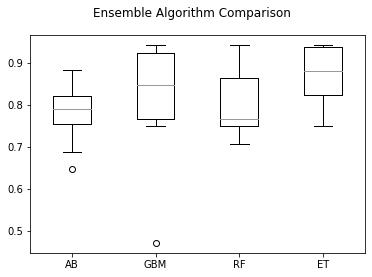

In [72]:
# Compare Algorithms with scaled data
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names) 
plt.show()

In [74]:
# ensembles with Scaled data 
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
    
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f' {name}:   {cv_results.mean():.5f}    {cv_results.std():.5f} ')

 ScaledAB:   0.78272    0.07245 
 ScaledGBM:   0.80221    0.12589 
 ScaledRF:   0.83272    0.10903 
 ScaledET:   0.86250    0.06488 


In [75]:
# prepare the model
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
model = SVC(C=1.7)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation) 
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9285714285714286
[[25  2]
 [ 1 14]]
              precision    recall  f1-score   support

           M       0.96      0.93      0.94        27
           R       0.88      0.93      0.90        15

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42

